## Quantile dot plot 

This notebook generates quantile dot plot 

In [19]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from quantile_dotplot import ntile_dotplot
import matplotlib

import pandas as pd
import json

#### Load Article Data

In [20]:
df_product_cat = pd.read_csv('intermediate_data/Product_Article_Matching.csv')
df_product_cat = df_product_cat.reset_index().rename({"index":"id"}, axis=1)
df_product_cat.head(5)

,id,Product Category,Product url,Article_1_Score,Article_1_Title,Article_1_Link,Article_2_Score,Article_2_Title,Article_2_Link,Article_3_Score,Article_3_Title,Article_3_Link
0,0,Plug Housings,https://www.digikey.com/en/products/filter/mod...,2.810,A quick and practical view of USB Power Delive...,https://www.edn.com/a-quick-and-practical-view...,1.417,Seeing inside entry-level audiophile desire: M...,https://www.edn.com/seeing-inside-entry-level-...,NaN,NaN,NaN
1,1,Embedded,https://www.digikey.com/en/products/category/e...,2.669,"DigiKey offers Zephyr RTOS workshop, video tra...",https://www.electronicsweekly.com/news/busines...,1.366,Indian Watchmaker Bets Big on Customized Manuf...,https://www.eetimes.com/indian-watchmaker-bets...,1.191,Arm Launches Zena to Accelerate AI-Defined Veh...,https://www.eetimes.com/arm-launches-zena-to-a...
2,2,"Test Clips - Alligator, Crocodile, Heavy Duty",https://www.digikey.com/en/products/filter/tes...,1.478,"China Weaponizes Rare Earths, Hitting Factories",https://www.eetimes.com/china-weaponizes-rare-...,1.279,Seeing inside entry-level audiophile desire: M...,https://www.edn.com/seeing-inside-entry-level-...,1.207,DMMs improve accuracy and usability,https://www.edn.com/dmms-improve-accuracy-and-...
3,3,"Pressure Sensors, Transducers",https://www.digikey.com/en/products/filter/pre...,2.269,Ambature to Deliver Superconductor IP for AI’s...,https://www.eetimes.com/ambature-to-deliver-su...,2.074,Indian Watchmaker Bets Big on Customized Manuf...,https://www.eetimes.com/indian-watchmaker-bets...,1.397,"China Weaponizes Rare Earths, Hitting Factories",https://www.eetimes.com/china-weaponizes-rare-...
4,4,"Trimmers, Variable Capacitors",https://www.digikey.com/en/products/filter/tri...,0.852,Seeing inside entry-level audiophile desire: M...,https://www.edn.com/seeing-inside-entry-level-...,NaN,NaN,NaN,NaN,NaN,NaN


#### Load Plot Data

In [21]:
df_pred = pd.read_csv("intermediate_data/05_present/Sales_Forcast_Dataframe.csv", index_col=0)
df_pred = df_pred.reset_index().rename({"index":"id"}, axis=1)
df_pred.head(5)

,id,090_day_forecast
0,0,39.0
1,1,64.0
2,2,31.0
3,3,18.0
4,4,24.0


#### Merge Names

In [22]:
df_display = df_pred.merge(df_product_cat, on="id")
df_display.head()

,id,090_day_forecast,Product Category,Product url,Article_1_Score,Article_1_Title,Article_1_Link,Article_2_Score,Article_2_Title,Article_2_Link,Article_3_Score,Article_3_Title,Article_3_Link
0,0,39.0,Plug Housings,https://www.digikey.com/en/products/filter/mod...,2.810,A quick and practical view of USB Power Delive...,https://www.edn.com/a-quick-and-practical-view...,1.417,Seeing inside entry-level audiophile desire: M...,https://www.edn.com/seeing-inside-entry-level-...,NaN,NaN,NaN
1,1,64.0,Embedded,https://www.digikey.com/en/products/category/e...,2.669,"DigiKey offers Zephyr RTOS workshop, video tra...",https://www.electronicsweekly.com/news/busines...,1.366,Indian Watchmaker Bets Big on Customized Manuf...,https://www.eetimes.com/indian-watchmaker-bets...,1.191,Arm Launches Zena to Accelerate AI-Defined Veh...,https://www.eetimes.com/arm-launches-zena-to-a...
2,2,31.0,"Test Clips - Alligator, Crocodile, Heavy Duty",https://www.digikey.com/en/products/filter/tes...,1.478,"China Weaponizes Rare Earths, Hitting Factories",https://www.eetimes.com/china-weaponizes-rare-...,1.279,Seeing inside entry-level audiophile desire: M...,https://www.edn.com/seeing-inside-entry-level-...,1.207,DMMs improve accuracy and usability,https://www.edn.com/dmms-improve-accuracy-and-...
3,3,18.0,"Pressure Sensors, Transducers",https://www.digikey.com/en/products/filter/pre...,2.269,Ambature to Deliver Superconductor IP for AI’s...,https://www.eetimes.com/ambature-to-deliver-su...,2.074,Indian Watchmaker Bets Big on Customized Manuf...,https://www.eetimes.com/indian-watchmaker-bets...,1.397,"China Weaponizes Rare Earths, Hitting Factories",https://www.eetimes.com/china-weaponizes-rare-...
4,4,24.0,"Trimmers, Variable Capacitors",https://www.digikey.com/en/products/filter/tri...,0.852,Seeing inside entry-level audiophile desire: M...,https://www.edn.com/seeing-inside-entry-level-...,NaN,NaN,NaN,NaN,NaN,NaN


#### Load Dot Plot Ratio

In [23]:
with open('intermediate_data/05_present/Dot_Plot_Ratio.json', 'r') as json_file:
    cat_dotplot_ratio_dict = json.load(json_file)
cat_dotplot_ratio_dict["0"][:10]

[1.10274622811379,
 1.075620195072732,
 1.065405619094332,
 1.0418655445437526,
 1.0472306270086833,
 1.073338505707987,
 1.0943292592541056,
 1.0155921947057949,
 1.0308640289342124,
 1.064380247570561]

#### Merge Datasets

#### Add in Dotplot Ratio Dict

In [24]:
df_display["dpr_dict"] = df_display["id"].apply(lambda x: cat_dotplot_ratio_dict[str(x)])
df_display.head()

,id,090_day_forecast,Product Category,Product url,Article_1_Score,Article_1_Title,Article_1_Link,Article_2_Score,Article_2_Title,Article_2_Link,Article_3_Score,Article_3_Title,Article_3_Link,dpr_dict
0,0,39.0,Plug Housings,https://www.digikey.com/en/products/filter/mod...,2.810,A quick and practical view of USB Power Delive...,https://www.edn.com/a-quick-and-practical-view...,1.417,Seeing inside entry-level audiophile desire: M...,https://www.edn.com/seeing-inside-entry-level-...,NaN,NaN,NaN,"[1.10274622811379, 1.075620195072732, 1.065405..."
1,1,64.0,Embedded,https://www.digikey.com/en/products/category/e...,2.669,"DigiKey offers Zephyr RTOS workshop, video tra...",https://www.electronicsweekly.com/news/busines...,1.366,Indian Watchmaker Bets Big on Customized Manuf...,https://www.eetimes.com/indian-watchmaker-bets...,1.191,Arm Launches Zena to Accelerate AI-Defined Veh...,https://www.eetimes.com/arm-launches-zena-to-a...,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."
2,2,31.0,"Test Clips - Alligator, Crocodile, Heavy Duty",https://www.digikey.com/en/products/filter/tes...,1.478,"China Weaponizes Rare Earths, Hitting Factories",https://www.eetimes.com/china-weaponizes-rare-...,1.279,Seeing inside entry-level audiophile desire: M...,https://www.edn.com/seeing-inside-entry-level-...,1.207,DMMs improve accuracy and usability,https://www.edn.com/dmms-improve-accuracy-and-...,"[1.3949346170081829, 1.3972329555288896, 1.437..."
3,3,18.0,"Pressure Sensors, Transducers",https://www.digikey.com/en/products/filter/pre...,2.269,Ambature to Deliver Superconductor IP for AI’s...,https://www.eetimes.com/ambature-to-deliver-su...,2.074,Indian Watchmaker Bets Big on Customized Manuf...,https://www.eetimes.com/indian-watchmaker-bets...,1.397,"China Weaponizes Rare Earths, Hitting Factories",https://www.eetimes.com/china-weaponizes-rare-...,"[-43.61596367154413, -18.773336606835716, -15...."
4,4,24.0,"Trimmers, Variable Capacitors",https://www.digikey.com/en/products/filter/tri...,0.852,Seeing inside entry-level audiophile desire: M...,https://www.edn.com/seeing-inside-entry-level-...,NaN,NaN,NaN,NaN,NaN,NaN,"[9587.086862762118, -49.69653554729111, -37.85..."


In [25]:
cat_specific = "Plug Housings"

def dotplot_sku_function(df , cat):
    plt.figure(figsize=(8, 6))  #


    data = df[df["Product Category"] == cat]["dpr_dict"].iloc[0]
    prediction = df[df["Product Category"] == cat]["090_day_forecast"].iloc[0]
    dotplotdata = np.abs(prediction * np.array(data))
    date_latest = "Jun/11/2025"
    dotplt = ntile_dotplot(dotplotdata, dots=20, hist_bins="auto")
    print(type(dotplt))
    dotplt.axvline(x=prediction, color='r', linestyle='--', linewidth=2, label='Prediction')
    dotplt.set_title("90 Day Sales Prediction for \n {} \n on {} ".format(cat, date_latest),
                                                                       fontsize=20)
    #, fontweight='bold')
    dotplt.set_xlabel("\n Forecast Unit Sales Next 90 Days", fontsize=20)

    # Remove top, right, and left spines, keep only bottom
    dotplt.spines['top'].set_visible(False)
    dotplt.spines['right'].set_visible(False)
    dotplt.spines['left'].set_visible(False)
    
    # Remove y-axis ticks and labels
    dotplt.set_yticks([])
    dotplt.set_ylabel('')
    
    from matplotlib.ticker import FuncFormatter
    dotplt.xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(round(x))}'))
    dotplt.tick_params(axis='x', labelsize=20) 
    #plt.tight_layout()
    dotplt.figure.savefig("figures/sfp_{}.png".format(cat.translate(str.maketrans(" /", "__"))), 
                          bbox_inches='tight', dpi=300, pad_inches=0.2)

<class 'matplotlib.axes._axes.Axes'>


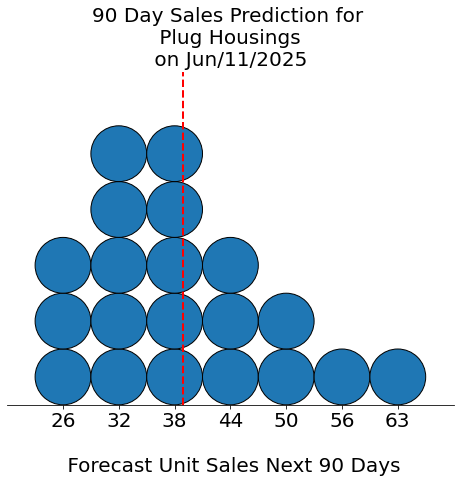

In [26]:
dotplot_sku_function(df_display, cat_specific)

#### Run for all Datasets

In [27]:
for cat_one in df_display["Product Category"].unique():
    #print(cat_one)
    dotplot_sku_function(df_display, cat_one)
    plt.clf()

<class 'matplotlib.axes._axes.Axes'>


<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>


/var/folders/yk/12gxrg_j4_7fdrzzrf8kxwr00000gn/T/ipykernel_38598/1037950732.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))  #


<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>